# Neural Networks 1

## A Single Neuron of Nervous System

Neurons are the primary components of the nervous system, along with the glial cells that give them structural and metabolic support. The nervous system is made up of the central nervous system, which includes the brain and spinal cord, and the peripheral nervous system, which includes the autonomic and somatic nervous systems. See https://en.wikipedia.org/wiki/Neuron for more information.

<div>
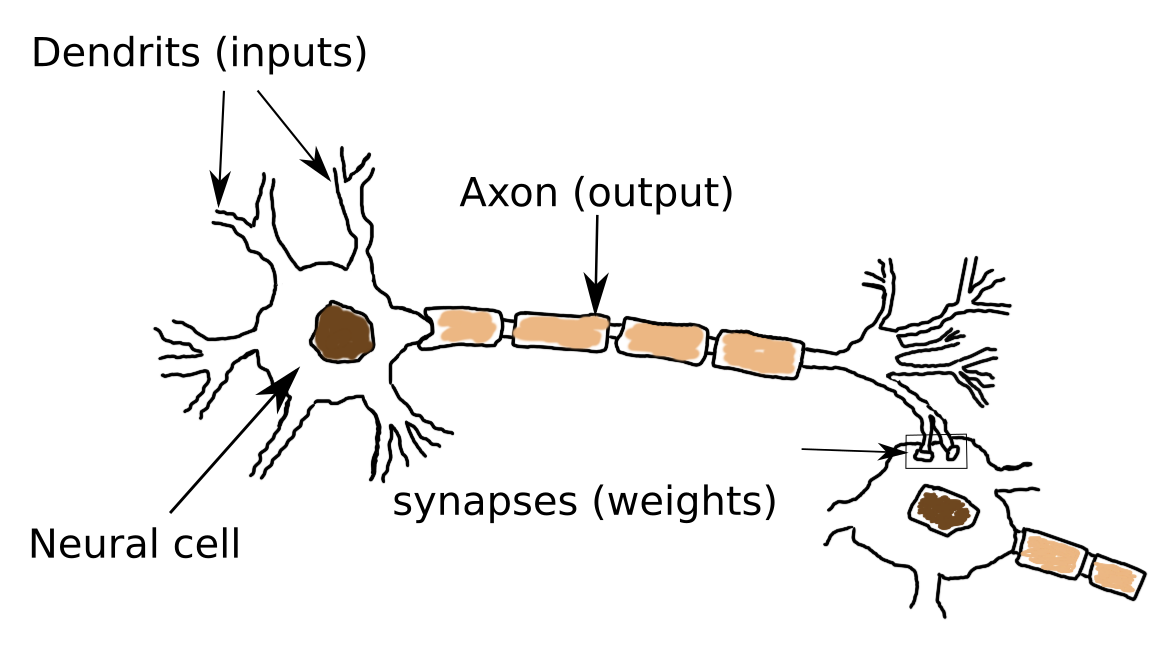
</div>

## An Artificial Neuron

Artificial neuron, sometimes called "Perceptron", is a mathematical model of simplified function of a neuron. The simplified function means mapping inputs to output using a liner  model and some non-linearity.

## Training Artificial Neuron

Training an artificial neuron corresponds to an optimization problem.

### Hebbian Learning

Hebbian learning was one of the first methods to train an artificial network. It is based on a simple idea - if the output fires everytime when the input fires, then the connection of that input should be strengthen. If output does not fire when the input fires, then the connection should be strong, but negative. 

#### Demo: Classifcation & Hebbian learning

Let's import some necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy.special import expit

print('scipy.special.expit is the logistic sigmoid function')

scipy.special.expit is the logistic sigmoid function


Let's then generate 5 data points from two normally distributed classes.

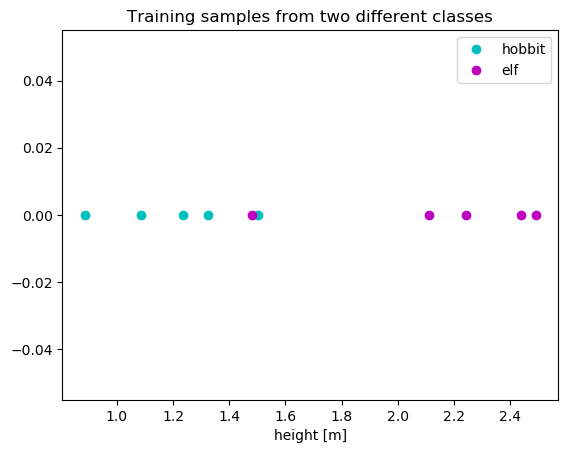

In [2]:
np.random.seed(13)
x_h = np.random.normal(1.1,0.3,5)
x_e = np.random.normal(1.9,0.4,5)
plt.plot(x_h,np.zeros([5,1]),'co', label="hobbit")
plt.plot(x_e,np.zeros([5,1]),'mo', label="elf")
plt.title('Training samples from two different classes')
plt.legend()
plt.xlabel('height [m]')
plt.show()

Let's assign each point suitable output ($y \in  0,1$).

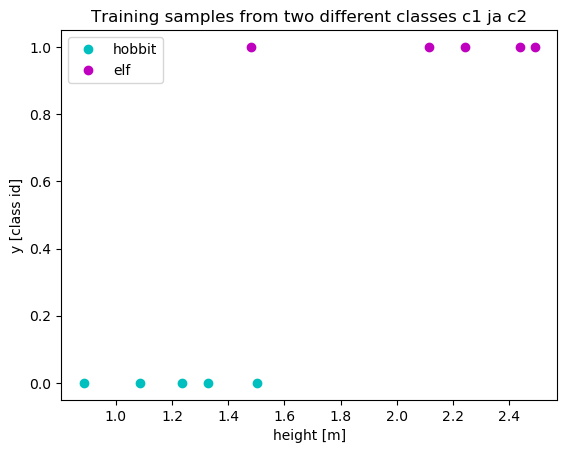

In [3]:
y_h = np.zeros(x_h.shape)
y_h[:] = 0.0
y_e = np.zeros(x_e.shape)
y_e[:] = +1.0
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.title('Training samples from two different classes c1 ja c2')
plt.legend()
plt.xlabel('height [m]')
plt.ylabel('y [class id]')
plt.show()

Let's put all training data points to the same vectors

In [4]:
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))
print(f'The size of x is {x_tr.size}')
print(f'The size of y is {y_tr.size}')

The size of x is 10
The size of y is 10


Let's set the initial weights $w_i^t$ for $t=0$: $w_0^0$ and $w_1^0$.

In [5]:
w0_t = 0
w1_t = 0

Let's calculate the Mean Squared Error (MSE) with the initial weights.

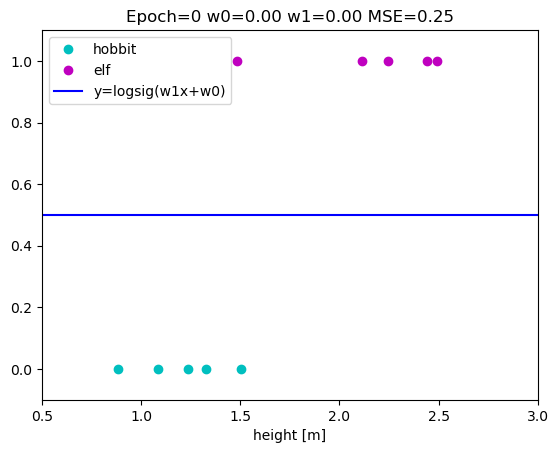

In [6]:
y_pred = expit(w1_t*x_tr+w0_t)
MSE = np.sum((y_tr-y_pred)**2)/(len(y_tr))
plt.title(f'Epoch=0 w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
x = np.linspace(0.0,+5.0,50)
plt.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
plt.xlabel('height [m]')
plt.axis([0.5,3.0,-0.1,+1.1])
plt.legend()
plt.show()

Hebbian learning for a selected number of epochs

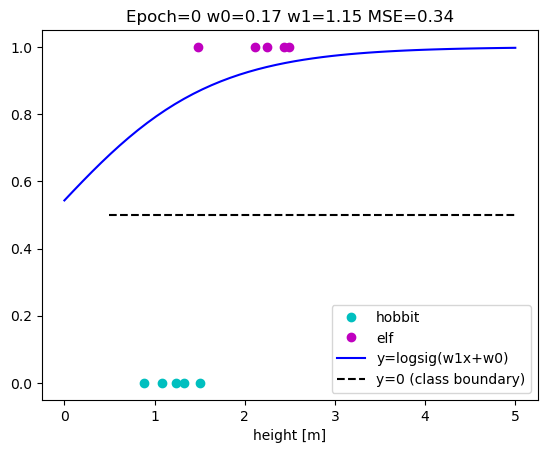

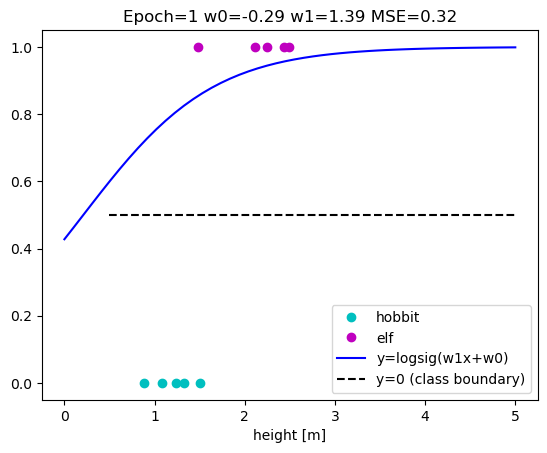

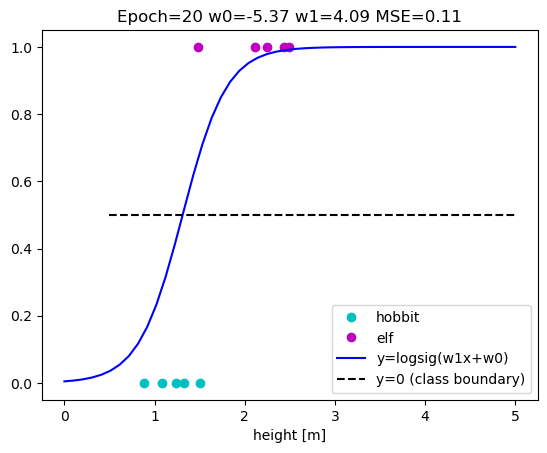

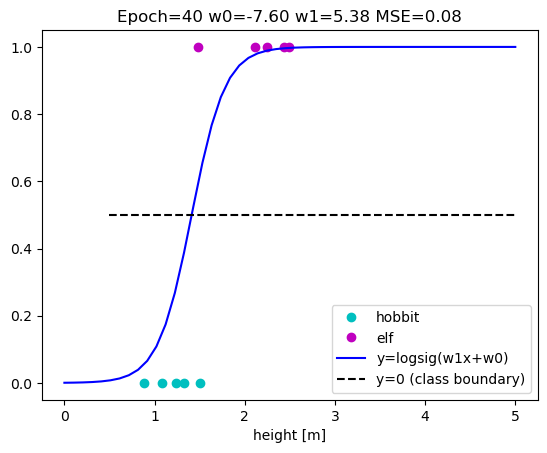

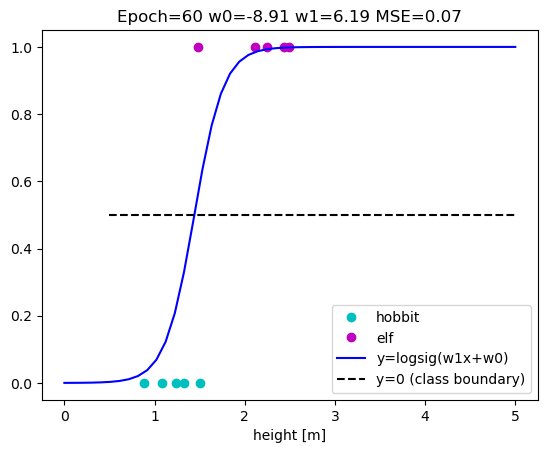

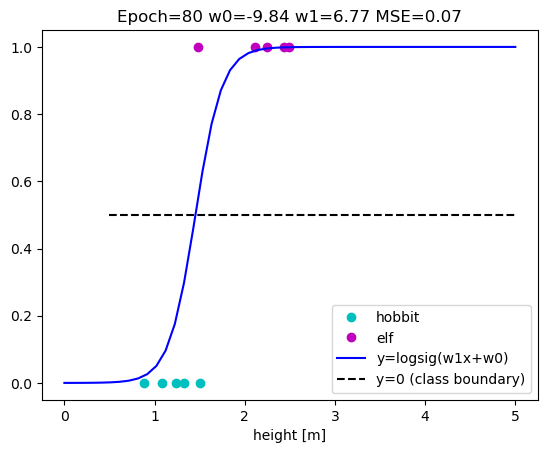

True values y=[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] and predicted values y_pred=[0.02 0.3  0.08 0.19 0.58 0.99 1.   1.   1.   0.55]


In [7]:
w0_t = 0
w1_t = 0
num_of_epochs = 100
learning_rate = 0.5

for e in range(num_of_epochs):
    for x_ind,x in enumerate(x_tr):
        # Hebbian learning implemented
        y = expit(w1_t*x+w0_t)
        w1_t = w1_t+learning_rate*(y_tr[x_ind]-y)*x
        w0_t = w0_t+learning_rate*(y_tr[x_ind]-y)*1
    if np.mod(e,20) == 0 or e == 1: # Plot after every 20th epoch
        y_pred = expit(w1_t*x_tr+w0_t)
        MSE = np.sum((y_tr-y_pred)**2)/(len(y_tr))
        plt.title(f'Epoch={e} w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
        plt.plot(x_h,y_h,'co', label="hobbit")
        plt.plot(x_e,y_e,'mo', label="elf")
        x = np.linspace(0.0,+5.0,50)
        plt.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
        plt.plot([0.5, 5.0],[0.5,0.5],'k--',label='y=0 (class boundary)')
        plt.xlabel('height [m]')
        plt.legend()
        plt.show()

np.set_printoptions(precision=2)
print(f'True values y={y_tr} and predicted values y_pred={y_pred}')

### Gradient Descent (GD)

Gradient descent is more popular training algorithm than the Hebbian learning rule.

\begin{equation}
    w_i^{t+1} = w_i^t-\mu\frac{\partial\epsilon_{MSE}}{\partial w_i}
\end{equation}


#### Demo: Classifcation & Gradient Descent

We can use the same initial values as before

In [8]:
w0_t = 0
w1_t = 0

and test these initial values.

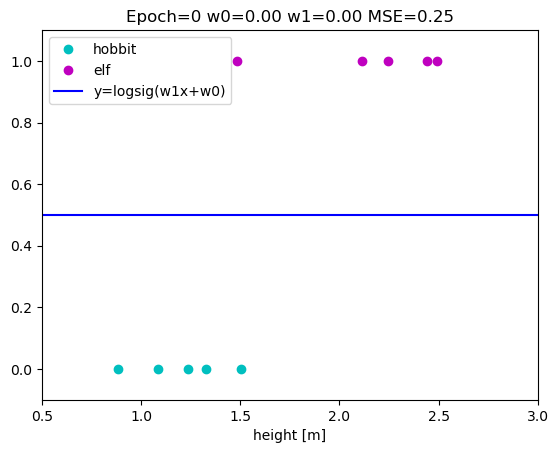

In [9]:
y_pred = expit(w1_t*x_tr+w0_t)
MSE = np.sum((y_tr-y_pred)**2)/(len(y_tr))
plt.title(f'Epoch=0 w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
x = np.linspace(0.0,+5.0,50)
plt.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
plt.xlabel('height [m]')
plt.axis([0.5,3.0,-0.1,+1.1])
plt.legend()
plt.show()

We next run GD for a number of epochs.

In [10]:
# Compute MSE heat map for different a and b
w0_t = 0
w1_t = 0
num_of_epochs = 100
learning_rate = 0.5

# TO BE ADDED BY YOU

### Evolutionary Algorithms

This is another branch, but not covered during this course. You should take a course about discrete optimization where evolutionary algorithms are likely covered. 

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapters 3 and 4 ([PDF](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)) - Bishop provides one of the best and most detailed but still elementary treatise of linear regression and classification.